In [1]:
!pip install adjustText

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
%matplotlib inline

In [3]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import keras
import pickle
from altair import *
import pandas as pd
from operator import itemgetter
import adjustText

Using TensorFlow backend.


In [ ]:
upvote_model = keras.models.load_model("predict_upvotes.h5")
upvote_embds = upvote_model.layers[1].get_weights()[0]
tsne_embds = TSNE(n_components=2).fit_transform(upvote_embds)
np.save("upvote_tsne_embds.npy", tsne_embds)

In [4]:
words = pickle.load(open("words.pkl", "rb"))
tsne_embds = np.load("upvote_tsne_embds.npy")

In [5]:
def plot_words(embed_words, words, num_to_plot, num_to_show, random=True):
    inv_map = {v: k for k, v in words.items()}
    if random:
        to_plot = np.random.randint(1, num_to_show, size=num_to_plot)
    else:
        to_plot = np.arange(1, num_to_plot)
    to_plot_words ={inv_map[word]: embed_words[word - 1] for word in to_plot}
    plt.style.use("ggplot")
    plt.figure(figsize=(12, 12), dpi=80)
    plt.scatter(x=tsne_embds[:num_to_show, 0], y=tsne_embds[:num_to_show, 1],
                c="blue")
    texts = [plt.text(point[0], point[1], label, size="x-large",
                      color="yellow", backgroundcolor="black") for label, point in to_plot_words.items()]
    adjustText.adjust_text(texts)

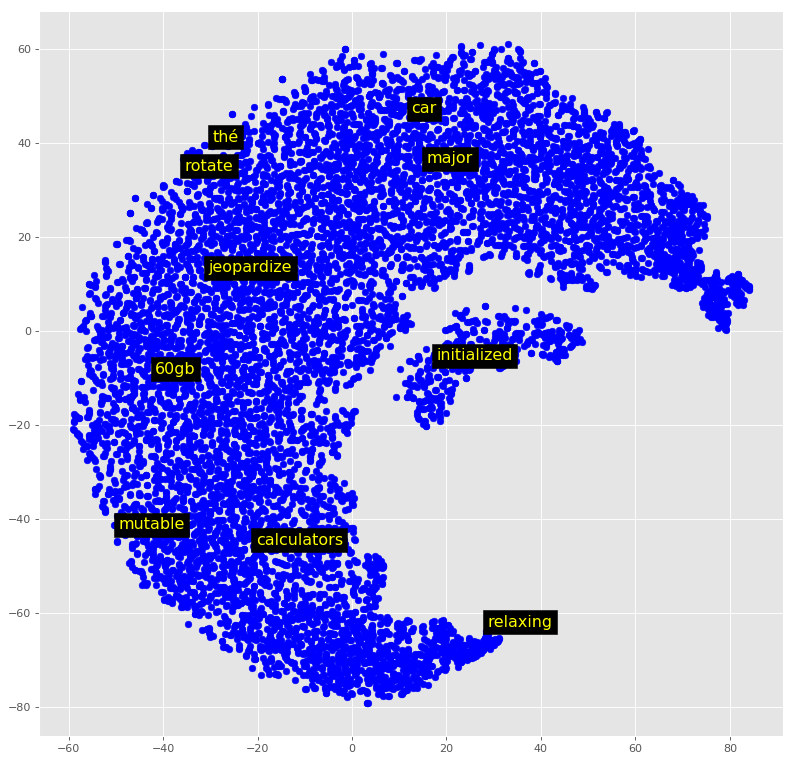

In [19]:
plot_words(tsne_embds, words, 10, len(tsne_embds), random=True)

In [20]:
def plot_k_nearest_words(word, embd_words, words, k):
    sorted_words = sorted([(v, k) for k, v in (list(words.items())[:10000])], key=itemgetter(0))
    sorted_words = pd.Series(list(zip(*sorted_words))[1])
    if word in words:
        word_index = words[word] - 1
        dists = pd.Series(((embd_words[word_index] - embd_words) ** 2).sum(axis=1))
        inds_sorted = dists.sort_values().index[:k + 1]
        to_plot_words = {sorted_words[ind]: embd_words[ind] for ind in inds_sorted}
        plt.style.use("ggplot")
        plt.figure(figsize=(12, 12), dpi=80)
        #print(df_embd_words)
        plt.scatter(x=embd_words[[inds_sorted], 0], y=embd_words[[inds_sorted], 1],
                    c="blue")
        texts = [plt.text(point[0], point[1], label, size="x-large") for label, point in to_plot_words.items()]
        adjustText.adjust_text(texts)


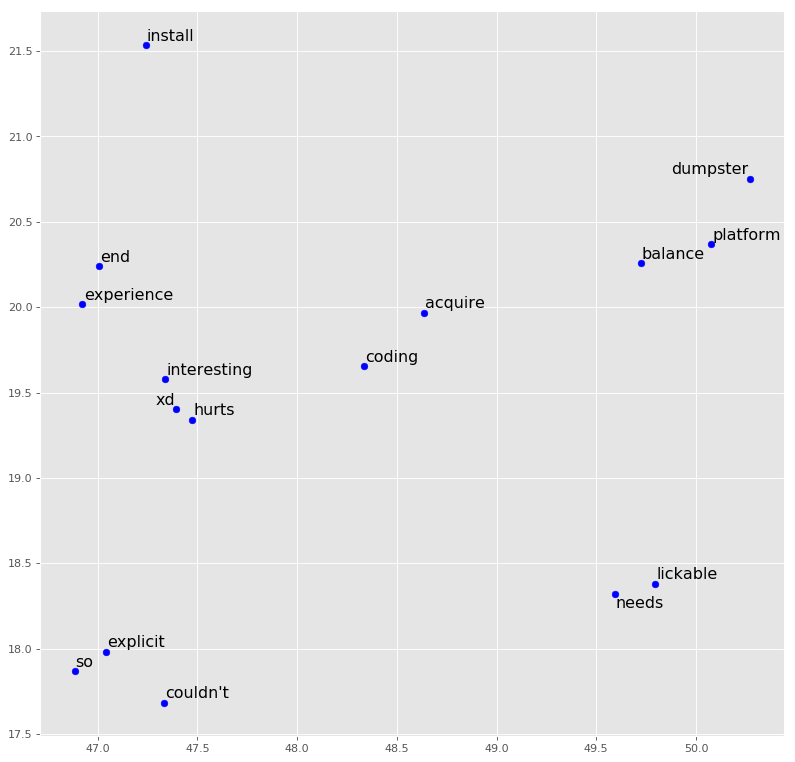

In [35]:
plot_k_nearest_words("coding", tsne_embds, words, 15)

In [ ]:
comment_texts = pickle.load(open("comment_texts.pkl", "rb"))
upvotes = np.load("comment_upvotes.npy")
words = pickle.load(open("words.pkl", "rb"))

In [ ]:
series_upvotes = pd.Series(upvotes)

In [ ]:
series_upvotes.describe()

In [ ]:
reduced = series_upvotes[series_upvotes.quantile(0.75) >= series_upvotes];
reduced[reduced >= series_upvotes.quantile(0.25)].plot.hist();

In [ ]:
comment_sentiment_scores = pd.DataFrame(np.load("comment_sentiment_scores.npy"), columns=["pos", "neu", "neg", "com"])
comment_sentiment_scores.com.hist(alpha=0.7)
comment_sentiment_scores.com.describe()

In [ ]:
inv_map = {v: k for k, v in words.items()}

comment_texts[comment_sentiment_scores.com.idxmin()]

In [ ]:
comment_texts[comment_sentiment_scores.com.idxmax()]